#### Introduction to Grid Search and Random Search using Twentynews group dataset. 
This Dataset has twenty categories of documents that can be classified using machine learning algorithms
Link: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [8]:
%matplotlib inline

from __future__ import print_function

from time import time
import sys
import os
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import fetch_20newsgroups


twenty_train = fetch_20newsgroups(subset='train', shuffle=True, 
                                  remove=('headers', 'footers', 'quotes'))
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [11]:
print (twenty_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

#### For our learning its only select 4 categories from the twenty categories.

Lets pick 4 different categories

alt.atheism
rec.sport.baseball
talk.politics.guns
comp.windows.x

In [20]:
categories = ['alt.atheism', 'rec.sport.baseball', 'talk.politics.guns', 'comp.windows.x']
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, 
                                  remove=('headers', 'footers', 'quotes'), categories= categories)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, remove=('headers', 'footers', 'quotes'),
                                 categories=categories)

In [21]:
twenty_train.data[0]

'\n\nEven if it were a capital offense, the warrant was not even an arrest warrant,\nbut a search warrant.  In other words, there was no evidence of illegal\narms, just enough of a suggestion to get a judge to sign a license to\nsearch for illegal evidence.'

In [22]:
twenty_train.target # targets are already encoded

array([3, 1, 1, ..., 3, 1, 2])

Next step is to use a vectorizer to vectorize the data. 
We use either count vectorizer and Tf-idf vectorizer.
There are others such as Hashing vectorizer available in scikit.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html

In [23]:
# Count Vectorizer for vectorizing
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=True, stop_words = 'english', binary= False)
X_train = count_vect.fit_transform(twenty_train.data)
X_train.shape

(2216, 28384)

In [24]:
X_test = count_vect.transform(twenty_test.data)
X_test.shape

(1475, 28384)

In [25]:
y_train = twenty_train.target
y_test = twenty_test.target

###### Lets train using three popular text classification algos, Bernolli Naive bayes, MultiNomial naive bayes and Random Forest classifier

In [26]:
# Lets use the below function to plot some metrics to evaluate our models

In [27]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def benchmark(clf_class, params, name):
    print("parameters:", params)
    t0 = time()
    clf = clf_class(**params).fit(X_train, y_train)
    print("done in %fs" % (time() - t0))

    print("Predicting the outcomes of the testing set")
    t0 = time()
    pred = clf.predict(X_test)
    print("done in %fs" % (time() - t0))
    
    print (" Printing Accuracy of the classifier")
    print (accuracy_score(y_test, pred))
    print ()

    print("Classification report on test set for classifier:")
    print(clf)
    print()
    print(classification_report(y_test, pred, target_names=categories))
    
    print ()
    print ("FI score metrics")
    print (precision_recall_fscore_support(y_test, pred, average='weighted'))

    cm = confusion_matrix(y_test, pred)
    print("Confusion matrix:")
    print(cm)

    # Show confusion matrix
    plt.matshow(cm)
    plt.title('CM of the %s ' % name)
    plt.colorbar()
    
    

# MultiNomial Naive Bayes
Link https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Testbenching a MultinomialNB classifier...
parameters: {'alpha': 1e-05}
done in 0.128666s
Predicting the outcomes of the testing set
done in 0.002435s
 Printing Accuracy of the classifier
0.8806779661016949

Classification report on test set for classifier:
MultinomialNB(alpha=1e-05, class_prior=None, fit_prior=True)

                    precision    recall  f1-score   support

       alt.atheism       0.86      0.80      0.83       319
rec.sport.baseball       0.96      0.95      0.95       395
talk.politics.guns       0.90      0.88      0.89       397
    comp.windows.x       0.80      0.88      0.84       364

          accuracy                           0.88      1475
         macro avg       0.88      0.88      0.88      1475
      weighted avg       0.88      0.88      0.88      1475


FI score metrics
(0.8827249041153266, 0.8806779661016949, 0.8809387379398291, None)
Confusion matrix:
[[254   6  17  42]
 [  2 374   8  11]
 [ 13   6 351  27]
 [ 26   3  15 320]]


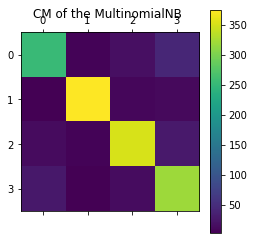

In [28]:
from sklearn.naive_bayes import MultinomialNB

print("Testbenching a MultinomialNB classifier...")
parameters = {'alpha': 0.00001}

benchmark(MultinomialNB, parameters, 'MultinomialNB')

In [86]:
# Remember the alpha in the Multinomial naive bayes is a hyper parameter which we will tune with GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:


parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = MultinomialNB()
gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

/Users/s2917623/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [31]:
print (gs_clf.best_score_)
print (gs_clf.best_params_)

0.9282490974729242
{'alpha': 0.1}


#### Its always advisable to hyper tune your data on the cross validation dataset. Therefore we divide our training data further into train and cross validation. There are many methods used for cross validation but the most commonly used is k fold stratified cross validation
Link : https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation

In [32]:
# Lets try the gridsearch CV with 5 fold cross validation (Default GridSearch uses 3 fold cv)

In [33]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = MultinomialNB()
gs_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [92]:
print ("All the cross validation results on all 5 folds of training")
gs_clf.cv_results_

All the cross validation results on all 5 folds of training


{'mean_fit_time': array([0.01318655, 0.01332555, 0.01021466, 0.01120076, 0.00952854,
        0.01204033]),
 'std_fit_time': array([0.00188432, 0.00266302, 0.00236589, 0.00270431, 0.00246323,
        0.00091356]),
 'mean_score_time': array([0.00368967, 0.0018538 , 0.00173597, 0.00181241, 0.00129232,
        0.00185823]),
 'std_score_time': array([0.0025824 , 0.00064908, 0.0005219 , 0.00030758, 0.0003458 ,
        0.00023551]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([0.92134831, 0.93033708, 0.92808989, 0.91460674, 0.89213483,
        0.83820225]),
 'split1_test_score': array([0.92567568, 0.93243243, 0.93018018, 0.93018018, 0.89864865,
        0.8536036 ]),
 'split2_test_score': array([0.94808126, 0.95485

In [34]:
# Best score
print (gs_clf.best_score_)

0.9332129963898917


In [35]:
# Get the best params
best_params =gs_clf.best_params_
print (best_params)

{'alpha': 0.01}


In [106]:
# Get the best classifier using best_estimator_
best_classifier = gs_clf.best_estimator_
best_classifier

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

The returned best classifer can be readily used for prediction or scoring on test data

In [95]:
# now that we have the best params, We can call our benchmark application

parameters: {'alpha': 0.01}
done in 0.008014s
Predicting the outcomes of the testing set
done in 0.002049s
 Printing Accuracy of the classifier
0.8874576271186441

Classification report on test set for classifier:
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

                    precision    recall  f1-score   support

       alt.atheism       0.84      0.82      0.83       319
rec.sport.baseball       0.96      0.94      0.95       395
talk.politics.guns       0.89      0.91      0.90       397
    comp.windows.x       0.85      0.86      0.85       364

          accuracy                           0.89      1475
         macro avg       0.88      0.88      0.88      1475
      weighted avg       0.89      0.89      0.89      1475


FI score metrics
(0.8876468603359146, 0.8874576271186441, 0.8874695051364756, None)
Confusion matrix:
[[261   6  17  35]
 [  4 372  10   9]
 [ 15   7 363  12]
 [ 32   3  16 313]]


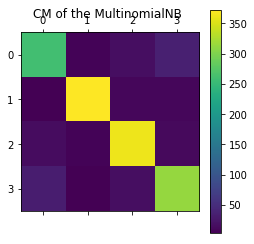

In [96]:
benchmark(MultinomialNB, best_params, 'MultinomialNB')

In [97]:
# Hyper parameter search is also done with RandomSearchCV, less popular compared to GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [98]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = MultinomialNB()
rs_clf = RandomizedSearchCV(clf, parameters, cv=5, n_jobs=-1, n_iter = 10)
rs_clf = gs_clf.fit(X_train, y_train)

In [99]:
# Best score
print (gs_clf.best_score_)

0.9332129963898917


In [100]:
# Get the best params
best_params =gs_clf.best_params_
print (best_params)

{'alpha': 0.01}


# NEXT UP ASSIGNMENT : TRY CLASSIFYING 20 NEWS GROUP DATASET with 10 CATEGORIES, USING either of the following algos

MultinomialNB
RandomForestClassifier
DecisionTreeClassifier
svm
Logistic Regression


# Look up assignment 2 notebook to get started

source : https://www.cs.bgu.ac.il/~elhadad/nlp17/Classification_20Groups_Sklearn.html